# Python Tutorial

In [1]:
print("Hello, World!")

Hello, World!


In [2]:
import os
from math import pi as pi
import numpy as np
import pandas as pd
from numpy.linalg import inv as inv
import matplotlib.pyplot as plt
import datetime

In [25]:
# Change directory
os.chdir("D:\\anaconda3\\")

In [2]:
os.getcwd()

'D:\\anaconda3'

In [6]:
# List files in directory
os.listdir()[0:4]

['.nonadmin',
 'api-ms-win-core-console-l1-1-0.dll',
 'api-ms-win-core-datetime-l1-1-0.dll',
 'api-ms-win-core-debug-l1-1-0.dll']

In [7]:
x, y, z = "GGE", "THJK", "YY77U"
print(x)

GGE


In [8]:
print(x,y,z)

GGE THJK YY77U


In [7]:
import pandas
# Create a data frame
pandas.DataFrame({"X":[1,2,3],"Y":[2,4,6], "Z":[5,5,9]})

,X,Y,Z
0,1,2,5
1,2,4,5
2,3,6,9


In [3]:
# Create a matrix array
A = numpy.array([[1,1,1,0],[-1,3,2,1],[4,4,-3,2],[-4,12,0,-3]]);A

array([[ 1,  1,  1,  0],
       [-1,  3,  2,  1],
       [ 4,  4, -3,  2],
       [-4, 12,  0, -3]])

In [64]:
# Import a data frame from a csv on github
url1="https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/data/sp500_data.csv.gz?raw=True"
sp500_px=pandas.read_csv(url1, compression="gzip")

# Rename the first column to date
sp500_px=sp500_px.rename({"Unnamed: 0":"Date"}, axis="columns")

In [34]:
# Show the first four rows of columns Date, ADS and CA
sp500_px[0:4][["Date","ADS","CA"]]

,Date,ADS,CA
0,1993-01-29,0.0,0.060124
1,1993-01-29,0.0,-0.180389
2,1993-01-29,0.0,-0.120257
3,1993-01-29,0.0,0.060124


In [4]:
# It's the same if you reverse the order
sp500_px[["Date","ADS","CA"]][0:4]

,Date,ADS,CA
0,1993-01-29,0.0,0.060124
1,1993-02-01,0.0,-0.180389
2,1993-02-02,0.0,-0.120257
3,1993-02-03,0.0,0.060124


In [73]:
# Convert Date to a datetime object
sp500_px.Date=pandas.to_datetime(sp500_px.Date)

In [83]:
# Create a new column for Year
sp500_px["Year"]=sp500_px.Date.dt.year
sp500_px[0:4][["Date","Year"]]

,Date,Year
0,1993-01-29,1993
1,1993-02-01,1993
2,1993-02-02,1993
3,1993-02-03,1993


In [85]:
# Subset condition and random sample
sp500_px[sp500_px.Year > 2007][["Date","Year"]].sample(6)

,Date,Year
4210,2009-10-15,2009
5363,2014-05-16,2014
5556,2015-02-23,2015
5437,2014-09-02,2014
4410,2010-08-03,2010
4834,2012-04-09,2012


In [4]:
# Matrix multiplication
I = numpy.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
C = numpy.matmul(A,I); C

array([[ 1,  1,  1,  0],
       [-1,  3,  2,  1],
       [ 4,  4, -3,  2],
       [-4, 12,  0, -3]])

In [5]:
# Inverse matrix
B=inv(A)
numpy.matmul(B,A).round()

array([[ 1.,  0., -0., -0.],
       [ 0.,  1., -0.,  0.],
       [ 0., -0.,  1., -0.],
       [ 0.,  0.,  0.,  1.]])

In [8]:
# Check commutative property
numpy.matmul(A,B).round()==numpy.matmul(B,A).round()

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [28]:
# Sequence of numbers from 0 to 1 by increment 0.1
numpy.arange(0,1+Delta_x,Delta_x)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [15]:
# A vector of all 1s
numpy.ones(Nx)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [14]:
# A for loop that adds a new item to a vector if a condition is satisfied
x=[]
for i in range(11):
    if i%2==0:
        x.append(i)

x

[0, 2, 4, 6, 8, 10]

\begin{align}
\frac{\partial m}{\partial t} &+ \frac{\partial}{\partial x}\left(-D_m \frac{\partial m}{\partial x}\right) = -\Phi(t) F(x,t) m,\\
\frac{\partial p}{\partial t} &+ \frac{\partial}{\partial x}\left(-D_p \frac{\partial p}{\partial x}\right) = \Phi(t) F(x,t) m - \Phi(t) \Gamma p^2,\\
\frac{\partial q}{\partial t} &= \Phi(t) \Gamma p^2.
\end{align}

In [17]:
def two_way_diffusion(Delta_x=0.05, Delta_t=0.01, total_time=100, lpmm=1000, I0=5):
    
    Nt=int((total_time+1)/Delta_t)
    Nx=1/Delta_x + 1
    Nx=int(Nx)
    x=numpy.arange(0,1+Delta_x,Delta_x)
    f = 1 + numpy.cos(2*pi*x)
    m1=numpy.ones(Nx)
    p1=numpy.zeros(Nx)
    q1=numpy.zeros(Nx)
    m=pandas.DataFrame({"x": x, "monomer": m1, "time": numpy.zeros(Nx)})
    p=pandas.DataFrame({"x": x, "short polymer": p1, "time": numpy.zeros(Nx)})
    q=pandas.DataFrame({"x": x, "immobile polymer": q1, "time": numpy.zeros(Nx)})
    Lambda=1/10/lpmm
    alpha_m=1.6e-7/Lambda/Lambda
    alpha_p=6.35e-10/Lambda/Lambda
    r=Delta_t/Delta_x/Delta_x
    beta=0.1*I0**0.3
    gamma=1
    
    for j in range(Nt):
    
        MM2=(2 + 2*r*alpha_m + Delta_t*beta*f)*numpy.identity(Nx)
        MM1=(2 - 2*r*alpha_m - Delta_t*beta*f)*numpy.identity(Nx)
        
        PP2=(2 + 2*r*alpha_p + Delta_t*gamma*p1)*numpy.identity(Nx)
        PP1=(2 - 2*r*alpha_p - Delta_t*gamma*p1)*numpy.identity(Nx)
    
        PM2=Delta_t*beta*f*numpy.identity(Nx)
        PM1=Delta_t*beta*f*numpy.identity(Nx)
    
        QQ2=2*numpy.identity(Nx)
        QQ1=2*numpy.identity(Nx)
    
        QP2=Delta_t*gamma*p1*numpy.identity(Nx)
        QP1=Delta_t*gamma*p1*numpy.identity(Nx)
    
        for i in range(Nx):
    
            if i==0:
                iminus1=1
            else:
                iminus1=i-1
            if i==(Nx-1):
                iplus1=Nx-1
            else:
                iplus1=i+1
        
            MM2[i][iminus1] = MM2[i][iminus1] - r*alpha_m
            MM2[i][iplus1] = MM2[i][iplus1] - r*alpha_m
        
            MM1[i][iminus1] = MM1[i][iminus1] + r*alpha_m
            MM1[i][iplus1] = MM1[i][iplus1] + r*alpha_m
    
            PP2[i][iminus1] = PP2[i][iminus1] - r*alpha_p
            PP2[i][iplus1] = PP2[i][iplus1] - r*alpha_p
        
            PP1[i][iminus1] = PP1[i][iminus1] + r*alpha_p
            PP1[i][iplus1] = PP1[i][iplus1] + r*alpha_p
        
        m2=numpy.matmul(inv(MM2), numpy.matmul(MM1, numpy.array(m1)))
        p2=numpy.matmul(inv(PP2), numpy.matmul(PP1, numpy.array(p1))) + numpy.matmul(inv(PP2), numpy.matmul(PM2, numpy.array(m2))) + numpy.matmul(inv(PP2), numpy.matmul(PM1, numpy.array(m1)))
        q2=numpy.matmul(inv(QQ2), numpy.matmul(QQ1, numpy.array(q1))) + numpy.matmul(inv(QQ2), numpy.matmul(QP2, numpy.array(p2))) +  numpy.matmul(inv(QQ2), numpy.matmul(QP1, numpy.array(p1)))
    
        if j > 0:
            if Delta_t*j in range(total_time+1):
                m=pandas.concat([m,pandas.DataFrame({"x": x, "monomer": m1, "time": numpy.zeros(Nx) + Delta_t*j})])
                p=pandas.concat([p,pandas.DataFrame({"x": x, "short polymer": p1, "time": numpy.zeros(Nx) + Delta_t*j})])
                q=pandas.concat([q,pandas.DataFrame({"x": x, "immobile polymer": q1, "time": numpy.zeros(Nx) + Delta_t*j})])
        
        m1=m2
        p1=p2
        q1=q2
    
    m=m[m.time.isin(range(total_time+1))]
    p=p[p.time.isin(range(total_time+1))]
    q=q[q.time.isin(range(total_time+1))]

    df=pandas.merge(m, p)
    df=pandas.merge(df, q)
    df=df[["time","x","monomer","short polymer","immobile polymer"]]
    df["Delta_x"]=Delta_x
    df["Delta_t"]=Delta_t
    df["total_time"]=total_time
    df["lpmm"]=lpmm
    df["I0"]=I0

    return df

In [44]:
df1=two_way_diffusion(total_time=80)

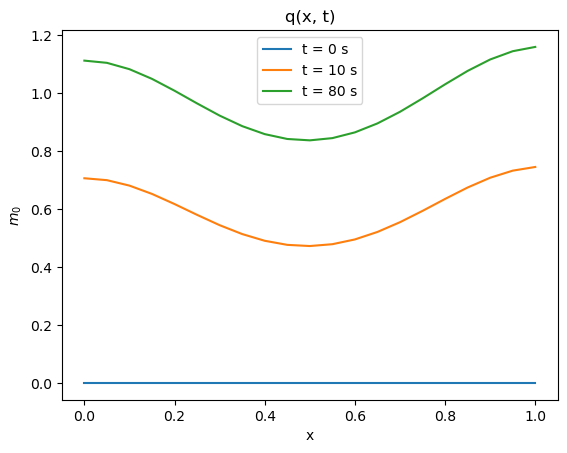

In [45]:
# Plot results
total_time=df1.total_time.unique()[0]
df=pandas.merge(
    df1[df1.time==0].rename(columns={"immobile polymer":"t = 0 s"})[["x","t = 0 s"]],
    df1[df1.time==10].rename(columns={"immobile polymer":"t = 10 s"})[["x","t = 10 s"]],
    on="x"
)

df=pandas.merge(
    df, 
    df1[df1.time==df1.total_time].rename(columns={"immobile polymer":"t = "+str(total_time)+" s"})[["x","t = "+str(total_time)+" s"]],
    on="x"
)

# Plot data frame
df.plot(x="x", title="q(x, t)", ylabel="$m_0$")
plt.show()

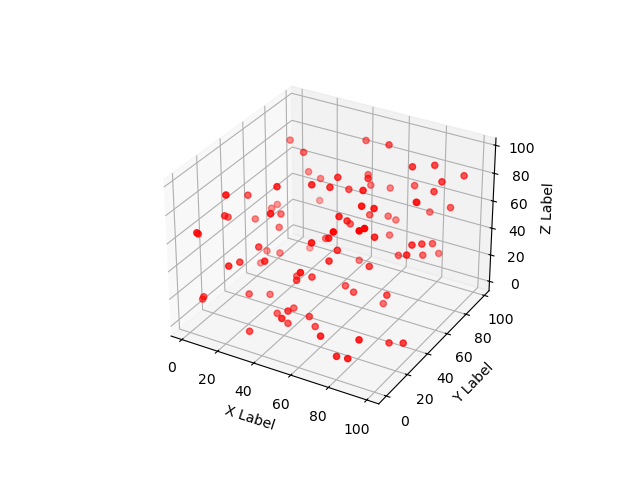

In [4]:
np.random.seed(42)
x = np.random.randint(0, 100, size=100)
y = np.random.randint(0, 100, size=100)
z = np.random.randint(0, 100, size=100)

# Creating a 3D scatter plot
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()